# Modelo de Classificação (in-vehicle-coupon-recommendation)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Análise Exploratória do Dataframe

In [2]:
df = pd.read_csv('in-vehicle-coupon-recommendation.csv')
print(df.shape)
df.head()

(12684, 26)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Removendo duplicatas

In [3]:
df = df.drop_duplicates()
print(df.shape)

(12610, 26)


### Analisando frequência dos valores de cada atributo

In [4]:
for coluna in df.columns.values:
    print(coluna.upper())
    print(df[coluna].value_counts())
    print("\n")

DESTINATION
No Urgent Place    6266
Home               3230
Work               3114
Name: destination, dtype: int64


PASSANGER
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: passanger, dtype: int64


WEATHER
Sunny    10011
Snowy     1397
Rainy     1202
Name: weather, dtype: int64


TEMPERATURE
80    6475
55    3830
30    2305
Name: temperature, dtype: int64


TIME
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: time, dtype: int64


COUPON
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: coupon, dtype: int64


EXPIRATION
1d    7031
2h    5579
Name: expiration, dtype: int64


GENDER
Female    6469
Male      6141
Name: gender, dtype: int64


AGE
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: age, dtype: int64


MARITALSTATUS
Married partner    

Como é possível observar pelo resultado acima, a coluna 'toCoupon_GEQ5min' é sempre constante (todo valor é igual a 1). Por isso, vamos retirá-la.

In [5]:
df.drop('toCoupon_GEQ5min', inplace=True, axis=1)

### Lidando com valores NaN

In [6]:
df.isnull().sum().sort_values(ascending=False)

car                     12502
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 150
RestaurantLessThan20      129
Bar                       107
destination                 0
income                      0
direction_opp               0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
occupation                  0
passanger                   0
education                   0
has_children                0
maritalStatus               0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
Y                           0
dtype: int64

Nesse caso, quase que todos os valores da coluna 'carro' são iguais a NaN. Por isso, vamos retirar a coluna. 

In [7]:
df.drop('car', inplace=True, axis=1)

Já para os demais, nós vamos imputar os valores mais frequentes naquela coluna.

Referência: https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas#:~:text=You%20can%20use%20df%20%3D%20df,frequent%20value%20from%20one%20column

In [8]:
colunas_com_na = ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']

for coluna in colunas_com_na:
    df = df.fillna(df[coluna].value_counts().index[0])

df.isnull().sum().sum()

0

### Matriz de Correlação

Como é possível observar pelo gráfico abaixo, dá para ver que direction_same e direction_op são altamente correlacionadas (uma é o oposto da outra). Por isso, vamos retirar a coluna "direction_opp".

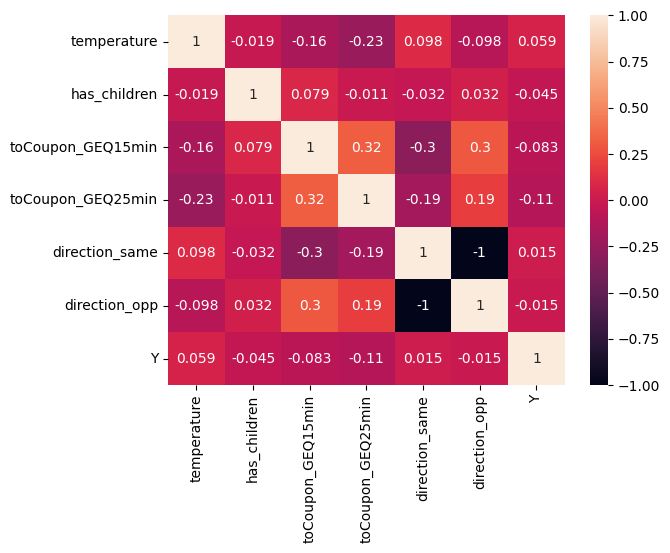

In [9]:
heatmap = sns.heatmap(df.corr(), annot=True)

In [10]:
df.drop('direction_opp', inplace=True, axis=1)

### Visualização dos Dados em cima da Resposta do Usuário

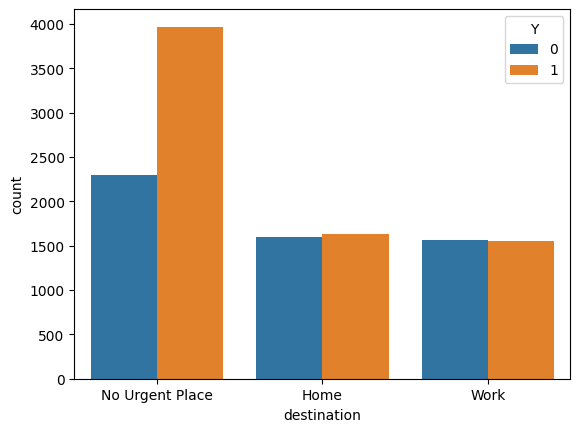

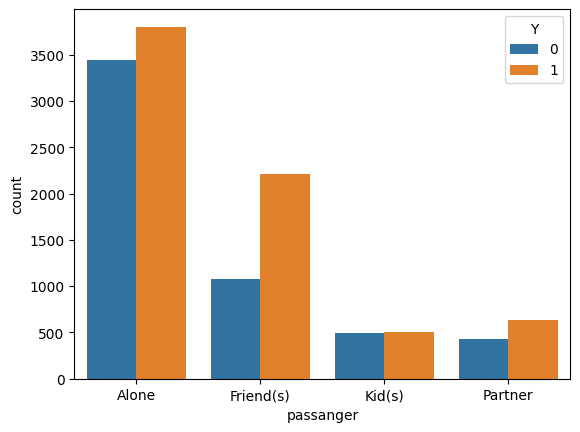

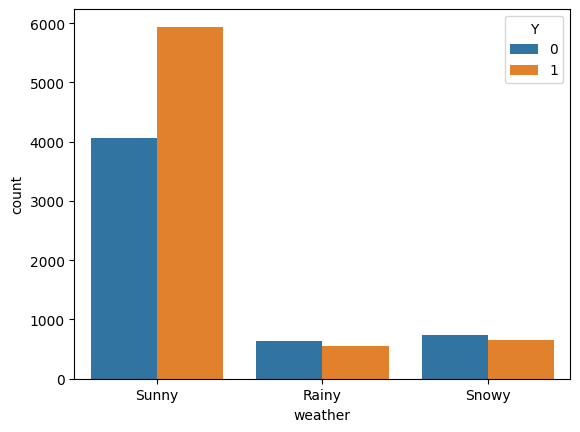

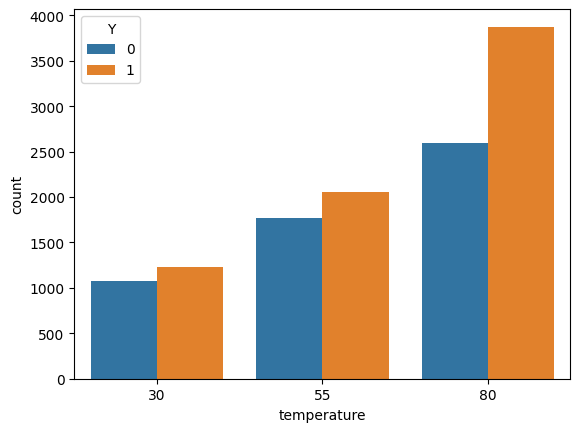

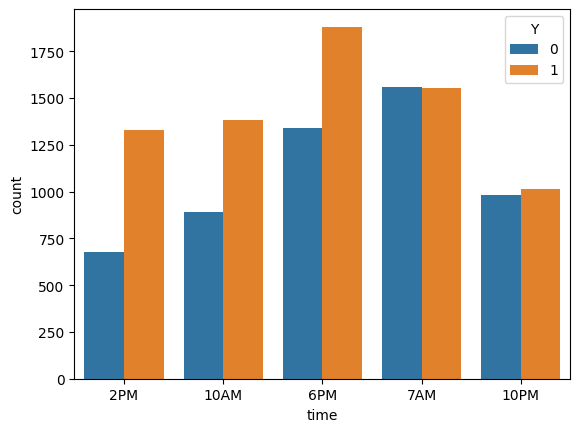

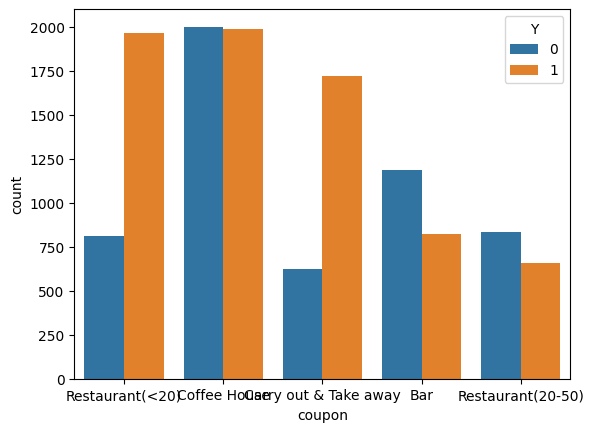

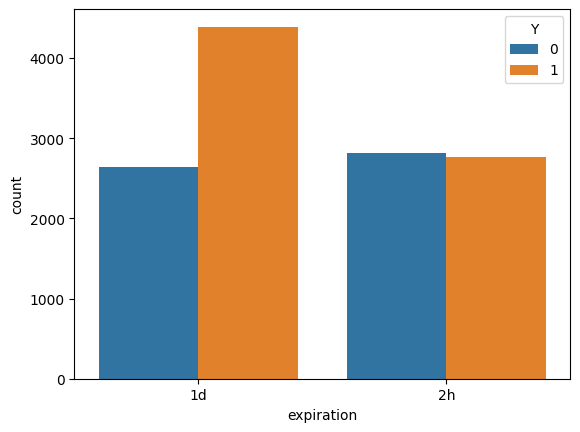

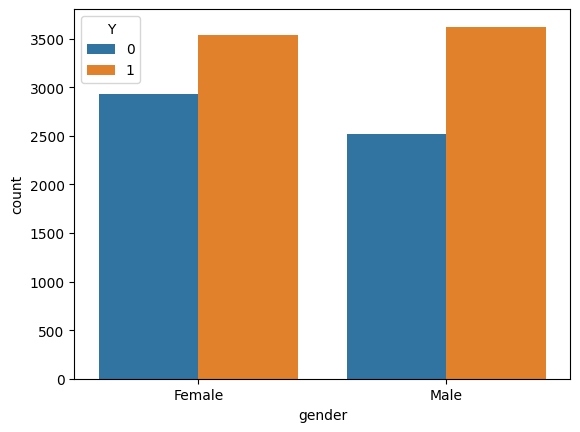

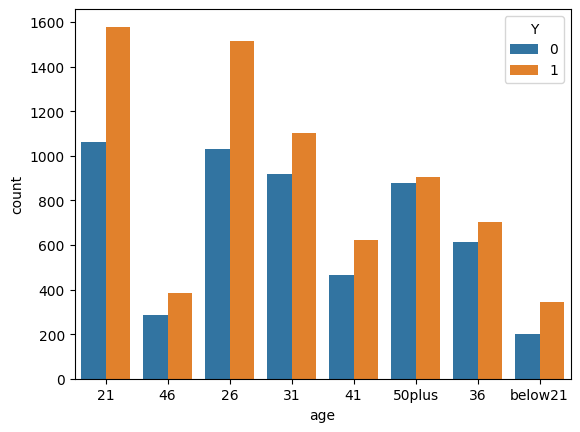

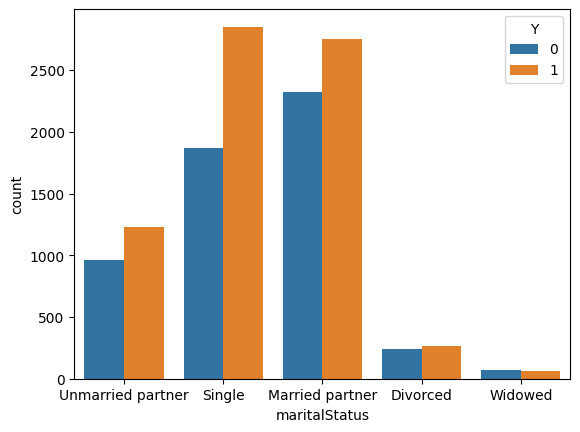

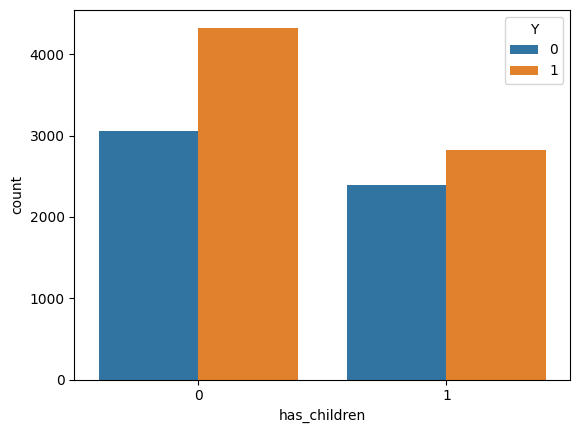

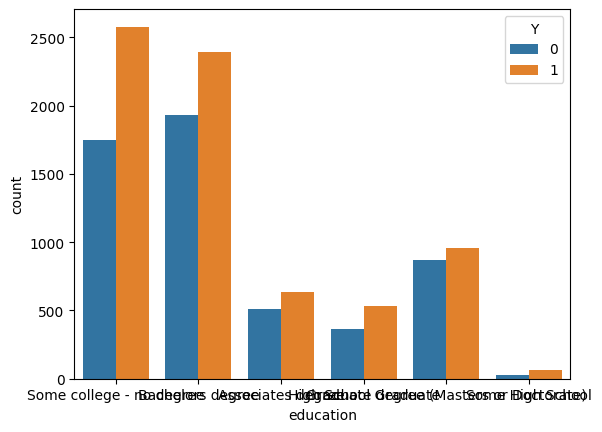

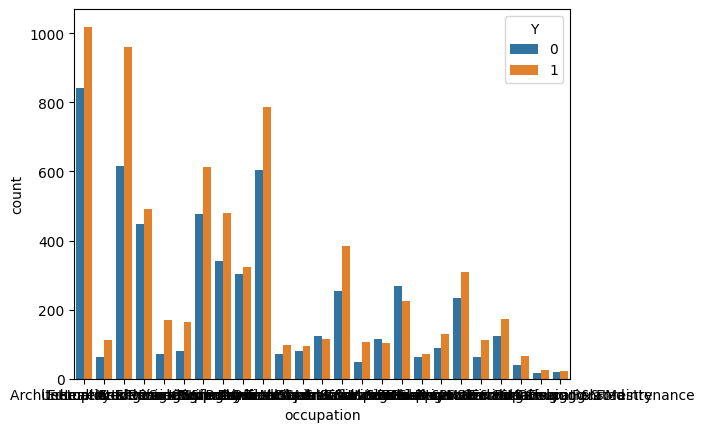

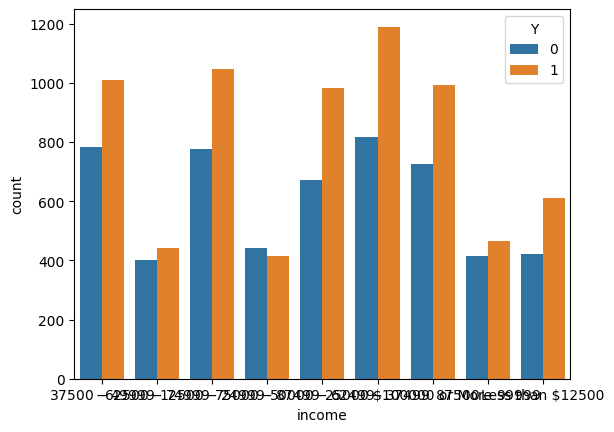

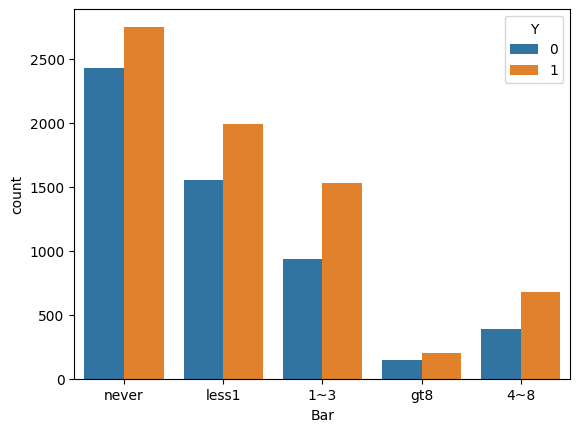

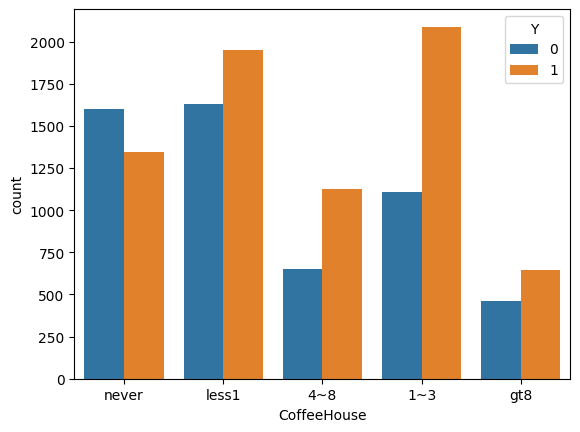

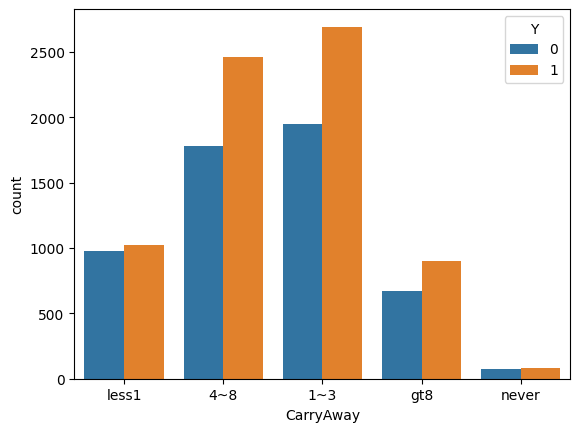

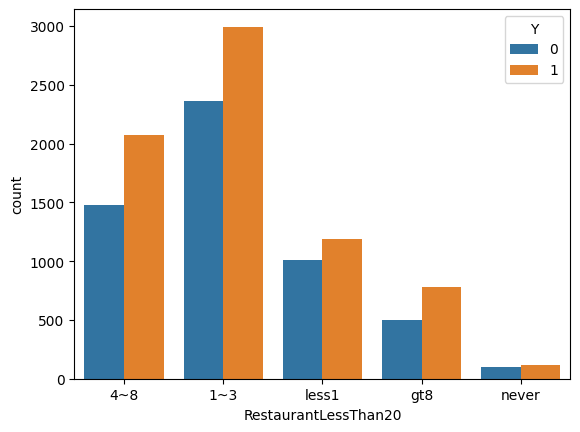

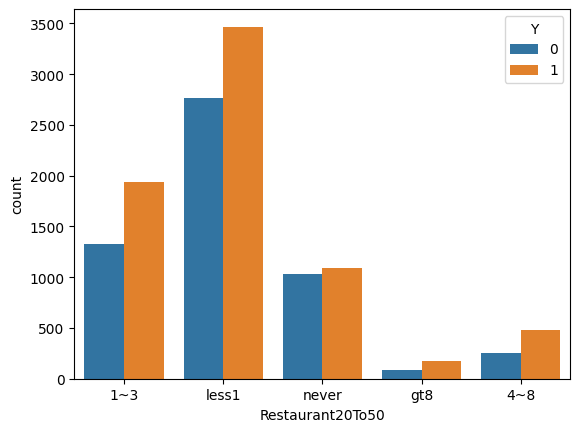

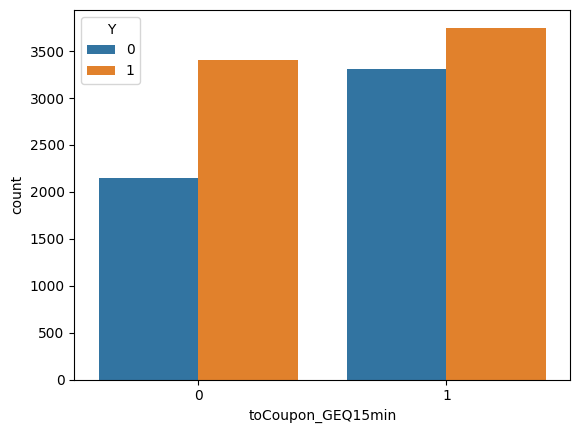

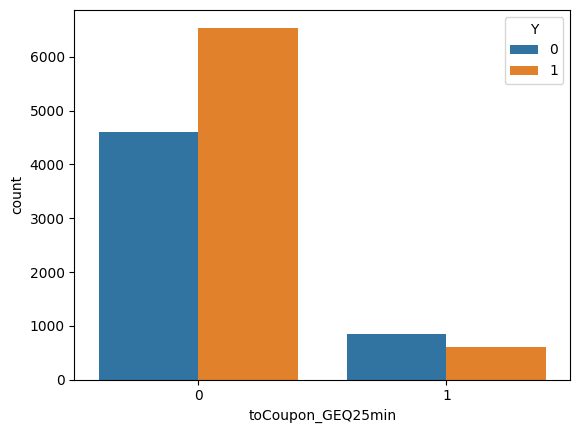

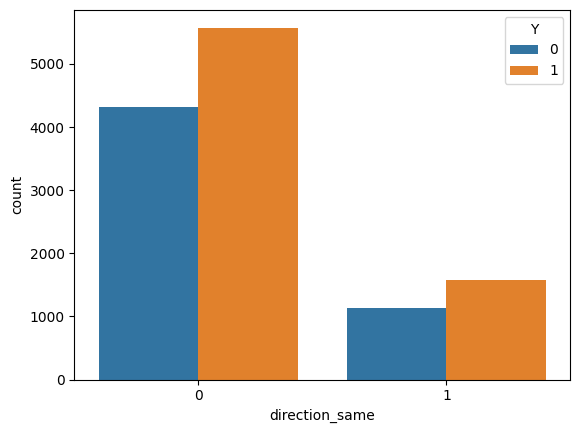

In [11]:
for coluna in df.columns[:-1]:
    sns.countplot(x=coluna, hue='Y',data=df)
    plt.show()

### Mapeando os Atributos Ordinais

Os atributos: age, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 são ordinais. Por isso, vamos mapeá-los para classes numéricas de acordo com a ordem das classes. Além disso, a classe dos últimos 6 atributos são as mesmas.

In [12]:
colunas_ordinais = ['age', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

age_map = {
    'below21': 0,
    '21': 1,
    '26': 2,
    '31': 3,
    '36': 4,
    '41': 5,
    '46': 6,
    '50plus': 7,
}

income_map = {
    'Less than $12500': 0,
    '$12500 - $24999': 1,
    '$25000 - $37499': 2,
    '$37500 - $49999': 3,
    '$50000 - $62499': 4,
    '$62500 - $74999': 5,
    '$75000 - $87499': 6,
    '$87500 - $99999': 7,
    '$100000 or More': 8,
}

others_map = {
    'never': 0,
    'less1': 1,
    '1~3': 2,
    '4~8': 3,
    'gt8': 4,
}

lista_maps = [age_map, income_map, others_map, others_map, others_map, others_map, others_map, others_map]

for i in range(len(colunas_ordinais)):
    coluna = colunas_ordinais[i]
    mapeamento = lista_maps[i]
    df[coluna] = df[coluna].map(mapeamento)

### Mapeando os Atributos Nominais

In [13]:
colunas_nominais = ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'education', 'occupation']

for coluna in colunas_nominais:
    lista_categorias = df[coluna].value_counts().index.tolist()
    dict_mapeamento = dict()
    for i in range(len(lista_categorias)):
        dict_mapeamento[lista_categorias[i]] = i
    df[coluna] = df[coluna].map(dict_mapeamento)

df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,0,0,0,55,2PM,1,1d,0,1,2,...,3,0,0,1,3,2,0,0,0,1
1,0,1,0,80,10AM,0,2h,0,1,2,...,3,0,0,1,3,2,0,0,0,0
2,0,1,0,80,10AM,2,2h,0,1,2,...,3,0,0,1,3,2,1,0,0,1
3,0,1,0,80,2PM,0,2h,0,1,2,...,3,0,0,1,3,2,1,0,0,0
4,0,1,0,80,2PM,0,1d,0,1,2,...,3,0,0,1,3,2,1,0,0,0


### Normalização das Colunas Numéricas

De acordo com a documentação, a data para o cupom expirar é ou 1 dia (24 horas) ou 2 horas. Por isso, vamos converter os dois para valores numéricos e normalizar. A mesma coisa acontece para a coluna 'time', cujos valores podem ser convertidos para a hora no dia indicada. 

In [14]:
df['expiration'] = df['expiration'].replace(['1d', '2h'], [24, 2])
df['time'] = df['time'].replace(['6PM', '7AM', '10AM', '2PM', '10PM'], [18, 7, 10, 14, 22])

In [15]:
from sklearn.preprocessing import StandardScaler
colunas_normalizadas = ['temperature', 'expiration', 'time']
df[colunas_normalizadas] = StandardScaler().fit_transform(df[colunas_normalizadas])

In [16]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,0,0,0,-0.431651,0.029504,1,0.890778,0,1,2,...,3,0,0,1,3,2,0,0,0,1
1,0,1,0,0.873653,-0.710884,0,-1.122614,0,1,2,...,3,0,0,1,3,2,0,0,0,0
2,0,1,0,0.873653,-0.710884,2,-1.122614,0,1,2,...,3,0,0,1,3,2,1,0,0,1
3,0,1,0,0.873653,0.029504,0,-1.122614,0,1,2,...,3,0,0,1,3,2,1,0,0,0
4,0,1,0,0.873653,0.029504,0,0.890778,0,1,2,...,3,0,0,1,3,2,1,0,0,0


## Avaliação dos Modelos

In [17]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import copy as cp

X = df.loc[:, df.columns != 'Y'] # excluindo do X os valores do alvo
Y = df.Y
kfold = StratifiedKFold(n_splits=10,  shuffle=True)

def avalia_modelo(modelo):   
    modelo_ = cp.deepcopy(modelo)
    scores = cross_validate(modelo_, X, y=Y, cv=kfold, scoring=('accuracy', 'f1_micro', 'f1_macro', 'f1_weighted', 'neg_log_loss'))
    print("Acurácia: %0.2f%%" %(scores['test_accuracy'].mean()*100))
    print("F1-Score Micro: %0.2f%%" %(scores['test_f1_micro'].mean()*100))
    print("F1-Score Macro: %0.2f%%" %(scores['test_f1_macro'].mean()*100))
    print("F1-Score Weighted: %0.2f%%" %(scores['test_f1_weighted'].mean()*100))
    print("Neg Log Loss: %0.2f" %(scores['test_neg_log_loss'].mean()))
    return

### Regressão Logística

In [18]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression()
print("Regressão Logística:")
avalia_modelo(lr)

Regressão Logística:
Acurácia: 62.96%
F1-Score Micro: 62.96%
F1-Score Macro: 60.34%
F1-Score Weighted: 61.72%
Neg Log Loss: -0.64


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
print("Random Forest:")
avalia_modelo(rf)

Random Forest:
Acurácia: 75.84%
F1-Score Micro: 75.84%
F1-Score Macro: 75.12%
F1-Score Weighted: 75.69%
Neg Log Loss: -0.51


#### Tuning de Hiperparâmetros da Random Forest

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [100, 200, 250, 300, 350, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [None, 4, 5, 6, 7, 8],
}

gs_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold)
gs_rf.fit(X, Y)
print(gs_rf.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 500}


In [23]:
rf_hp = RandomForestClassifier(n_estimators=500, max_depth=None, max_features='sqrt')
print("Random Forest (após tuning de hiperparâmetros):")
avalia_modelo(rf_hp)

Random Forest (após tuning de hiperparâmetros):
Acurácia: 76.35%
F1-Score Micro: 76.35%
F1-Score Macro: 75.57%
F1-Score Weighted: 76.16%
Neg Log Loss: -0.51


### KNN (K-Nearest Neighbors)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
print("KNN:")
avalia_modelo(knn)

KNN:
Acurácia: 67.12%
F1-Score Micro: 67.12%
F1-Score Macro: 65.71%
F1-Score Weighted: 66.65%
Neg Log Loss: -1.61


### SVM

In [25]:
from sklearn.svm import SVC

svc = SVC(probability=True)
print("SVC:")
avalia_modelo(svc)

SVC:
Acurácia: 67.84%
F1-Score Micro: 67.84%
F1-Score Macro: 65.57%
F1-Score Weighted: 66.76%
Neg Log Loss: -0.60
